In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
deputies = pd.read_csv('../data/deputies.csv')
parties = pd.read_csv('../data/parties.csv')
propositions = pd.read_csv('../data/propositions.csv')
votacao_parlamentar = pd.read_csv('../data/votacao_parlamentar.csv')
blocs = pd.read_csv('../data/blocs.csv')

In [72]:
propositions.head(10)

,id,uri,siglaTipo,codTipo,numero,ano,ementa,year
0,12669,https://dadosabertos.camara.leg.br/api/v2/prop...,CON,129,4.0,2000,Consulta acerca da possibilidade de assunção t...,2000
1,12741,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,133,739.0,2000,Sugere que a CPI dos Medicamentos investigue a...,2000
2,12742,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,133,880.0,2000,"Sugere ao Poder Executivo, inste ao Ministério...",2000
3,12743,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,133,919.0,2000,"Sugere ao Poder Executivo, por intermédio do M...",2000
4,12744,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,133,922.0,2000,"Sugere ao Poder Executivo, por intermédio do M...",2000
5,12745,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,133,930.0,2000,"Sugere ao Poder Executivo, por intermédio do M...",2000
6,12747,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,133,1028.0,2000,Sugere ao Presidente da Câmara dos Deputados h...,2000
7,12749,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,133,1125.0,2000,"Sugere ao Poder Executivo, por intermédio do M...",2000
8,12750,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,133,1134.0,2000,"Sugere ao Poder Executivo, por intermédio do M...",2000
9,12751,https://dadosabertos.camara.leg.br/api/v2/prop...,INC,133,1147.0,2000,"Sugere ao Poder Executivo, por intermédio do M...",2000


In [73]:
votacao_parlamentar.head(10)

,id_votacao,data,horario,voto,id_deputado,nome,sigla_partido,sigla_uf,id_legislatura
0,1454169,2002-02-26,20:39:33,Sim,74673.0,Max Mauro,PTB,ES,51
1,2130649,2002-12-18,13:20:09,Sim,74673.0,Max Mauro,PTB,ES,51
2,32428111,2002-03-19,20:39:29,Sim,74680.0,Dr. Heleno,PSDB,RJ,51
3,9881418,2002-12-11,23:42:16,Sim,73793.0,Edinho Bez,PMDB,SC,51
4,1466544,2002-04-23,19:30:24,Sim,73795.0,Hugo Biehl,PPB,SC,51
5,1454169,2002-02-26,20:41:11,Sim,73443.0,Cunha Bueno,PPB,SP,51
6,2130649,2002-12-18,13:19:12,Sim,73459.0,Dr. Rosinha,PT,PR,51
7,1466544,2002-04-23,19:37:38,Sim,74772.0,João Coser,PT,ES,51
8,1454169,2002-02-26,20:38:53,Sim,73572.0,João Magno,PT,MG,51
9,1466544,2002-04-23,19:32:23,Sim,73534.0,João Paulo,PT,SP,51


In [74]:
# Assuming 'id' in propositions and 'proposition_id' in votacao_parlamentar
if 'id' in propositions.columns and 'id_votacao' in votacao_parlamentar.columns:
    # Merge datasets to find propositions that went to vote
    merged_data = pd.merge(propositions, votacao_parlamentar, left_on='id', right_on='id_votacao', how='inner')

    # Propositions that were voted on
    voted_propositions = merged_data['id'].unique()
    
    print(f"Number of propositions that went to vote: {len(voted_propositions)}")
    
    # Add a column to propositions indicating if it was voted
    propositions['went_to_vote'] = propositions['id'].isin(voted_propositions)
    
    print(propositions[['id', 'went_to_vote']].head())
else:
    print("Matching columns not found in datasets.")

Number of propositions that went to vote: 3
      id  went_to_vote
0  12669         False
1  12741         False
2  12742         False
3  12743         False
4  12744         False


## Analysis

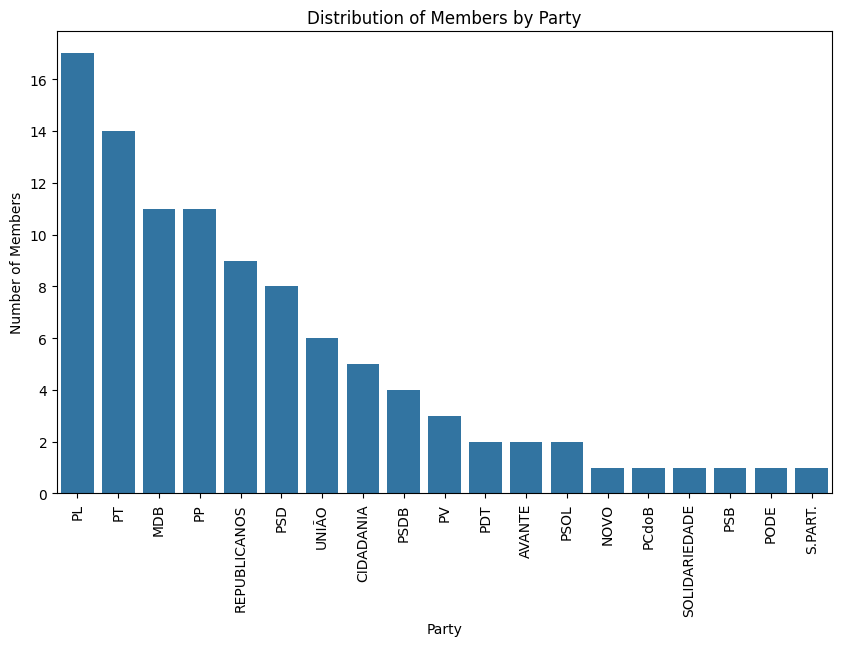

In [47]:
# Distribution of members by party
party_distribution = deputies['siglaPartido'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=party_distribution.index, y=party_distribution.values)
plt.title('Distribution of Members by Party')
plt.xlabel('Party')
plt.ylabel('Number of Members')
plt.xticks(rotation=90)
plt.show()


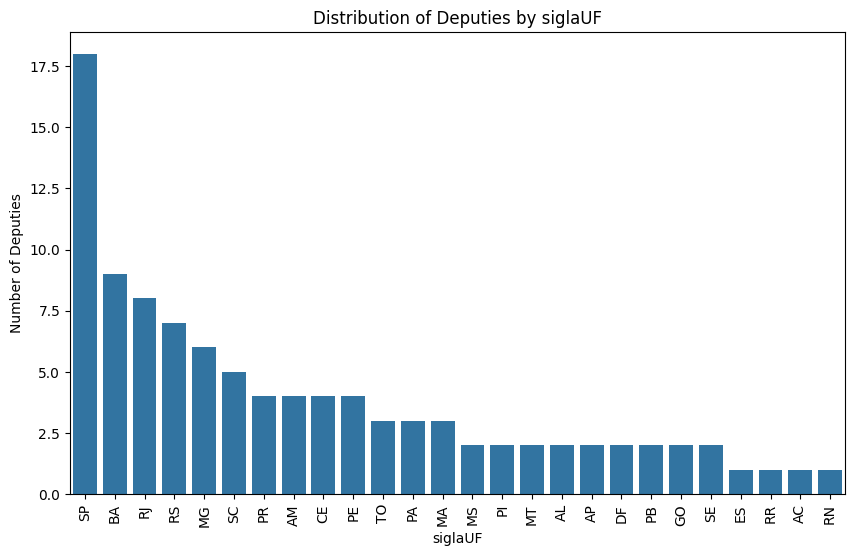

In [52]:
# Distribution of deputies by siglaUF
uf_distribution = deputies['siglaUf'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=uf_distribution.index, y=uf_distribution.values)
plt.title('Distribution of Deputies by siglaUF')
plt.xlabel('siglaUF')
plt.ylabel('Number of Deputies')
plt.xticks(rotation=90)
plt.show()

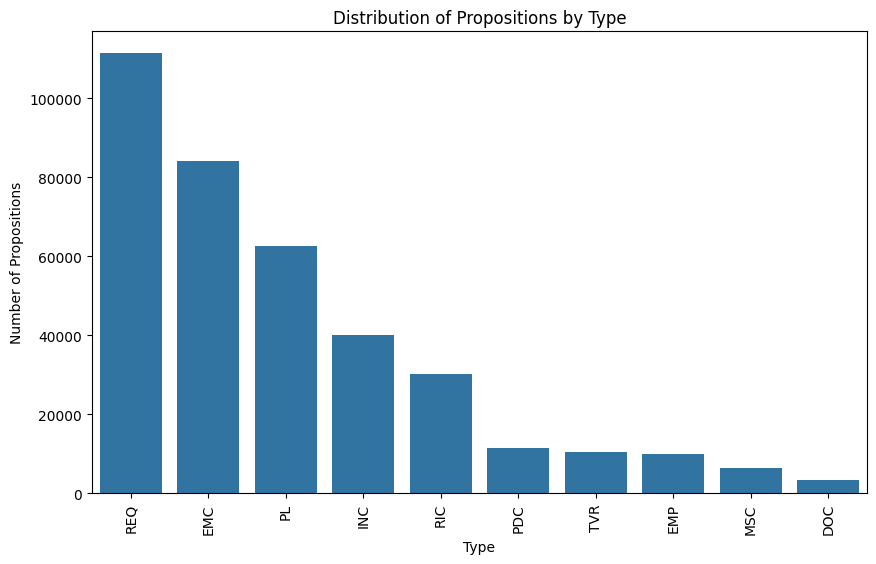

In [56]:
# Distribution of propositions by type
propositions_by_type = propositions['siglaTipo'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=propositions_by_type.index, y=propositions_by_type.values)
plt.title('Distribution of Propositions by Type')
plt.xlabel('Type')
plt.ylabel('Number of Propositions')
plt.xticks(rotation=90)
plt.show()

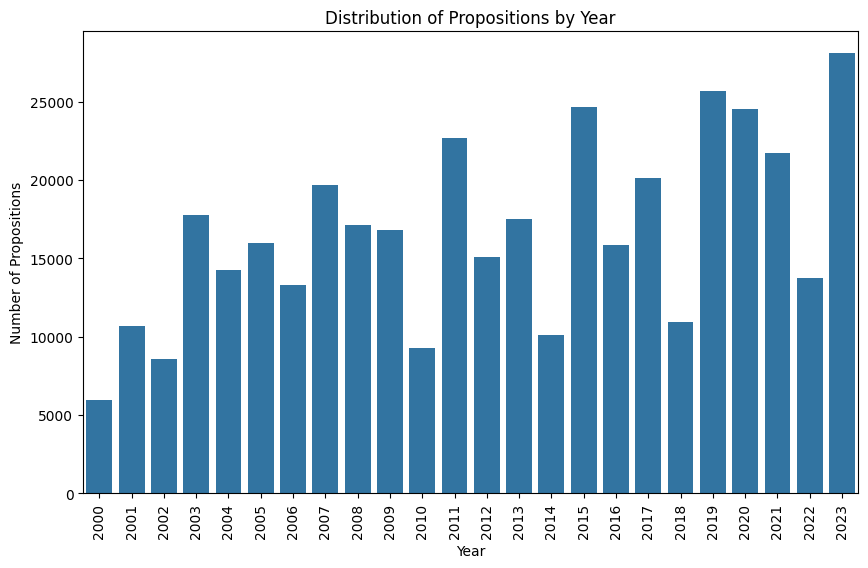

In [57]:
# Distribution of propositions by year
propositions_by_year = propositions['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=propositions_by_year.index, y=propositions_by_year.values)
plt.title('Distribution of Propositions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Propositions')
plt.xticks(rotation=90)
plt.show()

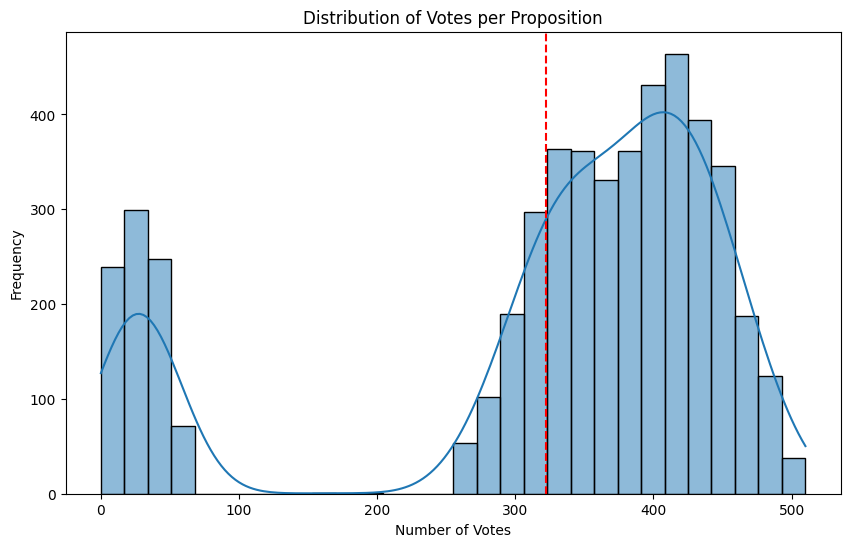

In [69]:
# Average number of votes per proposition
votes_per_proposition = votacao_parlamentar.groupby('id_votacao')['voto'].count()
average_votes_per_proposition = votes_per_proposition.mean()

plt.figure(figsize=(10, 6))
sns.histplot(votes_per_proposition, bins=30, kde=True)
plt.axvline(average_votes_per_proposition, color='r', linestyle='--')
plt.title('Distribution of Votes per Proposition')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

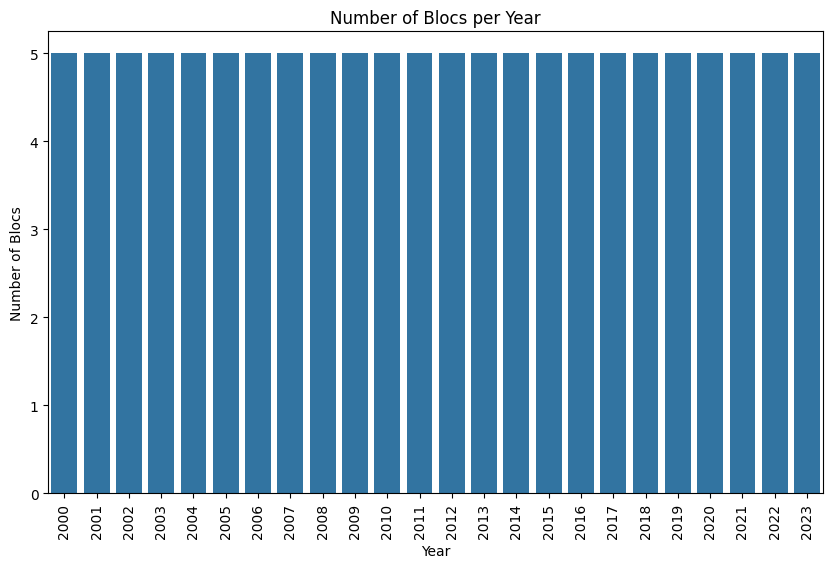

In [59]:
# Number of blocs per year
blocs_per_year = blocs['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=blocs_per_year.index, y=blocs_per_year.values)
plt.title('Number of Blocs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Blocs')
plt.xticks(rotation=90)
plt.show()


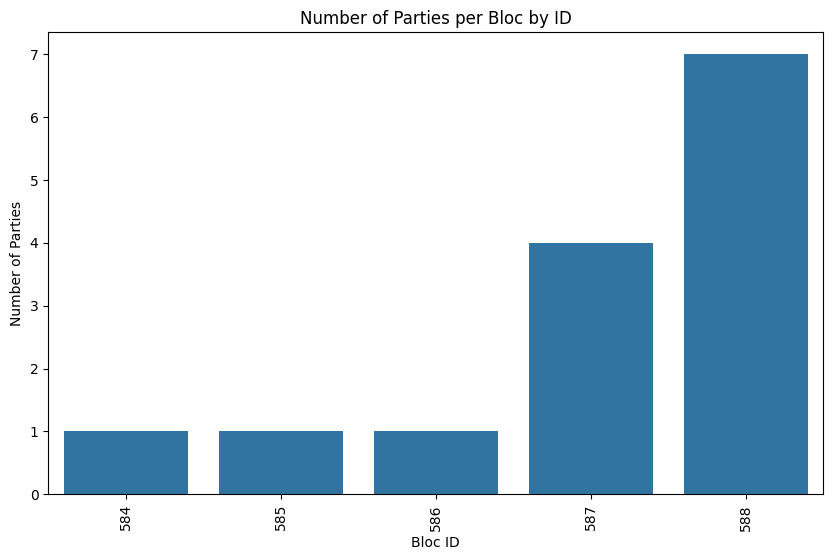

In [63]:
# Number of parties per bloc by ID
blocs['num_parties'] = blocs['nome'].apply(lambda x: len(x.split(',')))
parties_per_bloc_by_id = blocs[['id', 'num_parties']]

plt.figure(figsize=(10, 6))
sns.barplot(x=parties_per_bloc_by_id['id'], y=parties_per_bloc_by_id['num_parties'])
plt.title('Number of Parties per Bloc by ID')
plt.xlabel('Bloc ID')
plt.ylabel('Number of Parties')
plt.xticks(rotation=90)
plt.show()